In [ ]:
from ckiptagger import data_utils, WS
from collections import Counter
import re

text_115 = open("output_115.txt","r",encoding="utf-8").read()

text_115 = str(text_115)

text_115 = re.sub("xe2","",text_115)
text_115 = re.sub("x80","",text_115)
text_115 = re.sub("x99","",text_115)
text_115 = re.sub("x0c","",text_115)
text_115 = re.sub("x93","",text_115)
text_115 = re.sub("xe","",text_115)
text_115 = re.sub("x93","",text_115)
text_115 = re.sub("x93","",text_115)

text_115 = re.sub("一","",text_115)
text_115 = re.sub("二","",text_115)
text_115 = re.sub("三","",text_115)
text_115 = re.sub("四","",text_115)
text_115 = re.sub("五","",text_115)
text_115 = re.sub("六","",text_115)
# text = re.sub("\\\\","",text)

text_115 = re.sub("，","",text_115)
text_115 = re.sub("、","",text_115)
text_115 = re.sub("。","",text_115)
text_115 = re.sub("與","",text_115)
text_115 = re.sub("及","",text_115)
text_115 = re.sub("（","",text_115)
text_115 = re.sub("）","",text_115)
text_115 = re.sub("「","",text_115)
text_115 = re.sub("」","",text_115)
text_115 = re.sub("\n","",text_115)


# data_utils.download_data_gdown("./") 
ws = WS("./data")

word_sentence_list = ws(
    [text_115],)

dictionary = Counter(word_sentence_list[0])

freq = {}
for ele in dictionary:
    freq[ele] = dictionary[ele]


In [2]:
# 收集出現30次以上的字詞名單
collect_115list = []
for index_descend_ in sorted(freq.items(), key=lambda x:x[1], reverse=True):
    if index_descend_[1]> 30:
        collect_115list.append(index_descend_[0])  

In [3]:
collect_115list

['發展',
 '計畫',
 '產業',
 '推動',
 '科技',
 '技術',
 '等',
 '辦理',
 '並',
 '能源',
 '之',
 '工程',
 '智慧',
 '管理',
 '以',
 '提升',
 '協助',
 '國際',
 '系統',
 '環境',
 '轉型',
 '創新',
 '應用',
 '企業',
 '服務']

In [4]:
text_108 = open("output_108.txt","r",encoding="utf-8").read()
text_108 = str(text_108)

text_108 = re.sub("xe2","",text_108)
text_108 = re.sub("x80","",text_108)
text_108 = re.sub("x99","",text_108)
text_108 = re.sub("x0c","",text_108)
text_108 = re.sub("x93","",text_108)
text_108 = re.sub("xe","",text_108)
text_108 = re.sub("x93","",text_108)
text_108 = re.sub("x93","",text_108)

text_108 = re.sub("一","",text_108)
text_108 = re.sub("二","",text_108)
text_108 = re.sub("三","",text_108)
text_108 = re.sub("四","",text_108)
text_108 = re.sub("五","",text_108)
text_108 = re.sub("六","",text_108)
# text = re.sub("\\\\","",text)

text_108 = re.sub("，","",text_108)
text_108 = re.sub("、","",text_108)
text_108 = re.sub("。","",text_108)
text_108 = re.sub("與","",text_108)
text_108 = re.sub("及","",text_108)
text_108 = re.sub("（","",text_108)
text_108 = re.sub("）","",text_108)
text_108 = re.sub("「","",text_108)
text_108 = re.sub("」","",text_108)
text_108 = re.sub("\n","",text_108)


# data_utils.download_data_gdown("./") 
ws = WS("./data")

word_sentence_list = ws(
    [text_108],)

dictionary = Counter(word_sentence_list[0])

freq = {}
for ele in dictionary:
    freq[ele] = dictionary[ele]

In [5]:
# 收集出現30次以上的字詞名單
collect_108list = []
for index_descend_ in sorted(freq.items(), key=lambda x:x[1], reverse=True):
    # print(index_descend_) 
    if index_descend_[1]> 30:
        collect_108list.append(index_descend_[0])

In [6]:
collect_108list

[' ',
 '計畫',
 '發展',
 '產業',
 '之',
 '推動',
 '：',
 '技術',
 '能源',
 '科技',
 '等',
 '管理',
 '國際',
 '創新',
 '以',
 '工程',
 '環境',
 '並',
 '協助',
 '服務',
 '辦理',
 '建立',
 '研發',
 '智慧',
 '公共',
 '建設',
 '經濟',
 '政策',
 '系統']

In [7]:
compared_list = [
    "".join(collect_108list),
    "".join(collect_115list)
]

In [13]:
# 使用矩陣matrix顯示TF IDF在兩篇計劃書中的scores
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#使用 ckiptagger的斷詞
def tokenizer(text):
    return ws([text],)[0]

tf_vectorizer = CountVectorizer(tokenizer=tokenizer, token_pattern=None)
tf_matrix = tf_vectorizer.fit_transform(compared_list)
feature_names = tf_vectorizer.get_feature_names_out()
tf_matrix = tf_matrix.toarray()
tf = pd.DataFrame(tf_matrix, columns=feature_names)

tf

idf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None)
idf_vectorizer.fit_transform(compared_list)
idf_vector = idf_vectorizer.idf_
idf = pd.DataFrame(idf_vector, index=feature_names, columns=["IDF"])

idf

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, norm=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(compared_list)
tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

tfidf

,,並,之,以,企業,公共,創新,協助,國際,工程,...,科技,等,管理,系統,經濟,能源,計畫,轉型,辦理,：
0,1.405465,1.0,1.0,1.0,0.000000,1.405465,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.405465,1.0,1.0,0.000000,1.0,1.405465
1,0.000000,1.0,1.0,1.0,1.405465,0.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.405465,1.0,0.000000


In [14]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 下載繁體中文字型 已下載過可以略過
# !wget -O SourceHanSerifTW-VF.ttf https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf

# 加入字型檔
fm.fontManager.addfont('SourceHanSerifTW-VF.ttf')

# 設定字型
mpl.rc('font', family='Source Han Serif TW VF')

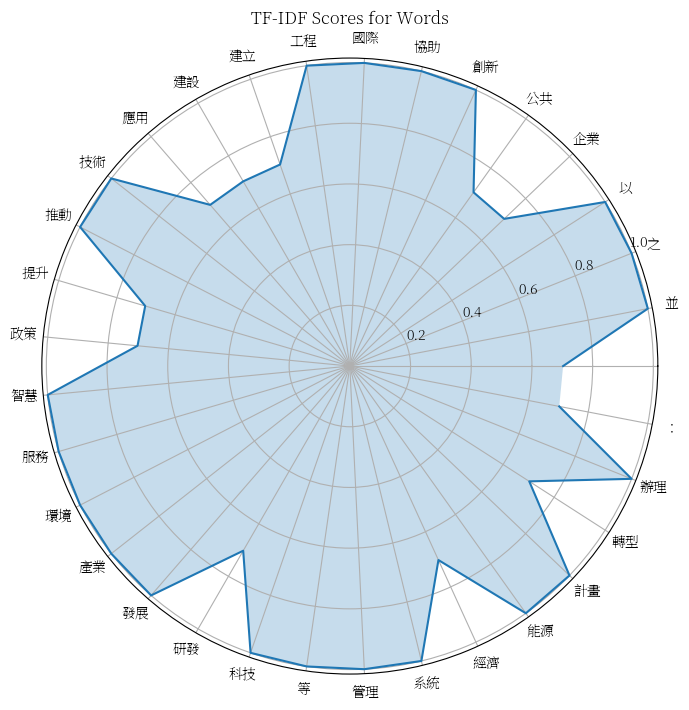

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 獲取每個詞彙的TF-IDF值
tfidf_scores = tfidf_matrix.toarray().T

# 繪製每個詞彙的TF-IDF值
plt.figure(figsize=(8, 8))
plt.polar(np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False), tfidf_scores.mean(axis=1))
plt.fill(np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False), tfidf_scores.mean(axis=1), alpha=0.25)
plt.xticks(np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False), feature_names, rotation=90)
plt.title('TF-IDF Scores for Words')
plt.show()

### 嚴格意義上來說，此呈現只是方便統一看字詞分佈的scores，在實務上並不推薦
### 因使用來源已經是過濾出現30次以上的字詞，脫離context（所以看起來每個分數都很高），而雷達圖示也不適合太多字詞一起出現
### 適用場景應該是短文或短句，多個來源來比較（如社群媒體分析）